### 09. 과적합(Overfitting)을 막는 방법들

##### **모델의 과적합**
- 모델의 성능을 떨어뜨리는 주요 문제
- 특징 : 훈련 데이터에 대한 정확도는 높을지몰라도, 검증 데이터나 테스트 데이터와 같이 새로운 데이터에 대해서는 제대로 동작하지 않는다. 
- 이유 : 모델이 학습 데이터를 불필요한 정도로 과하게 암기하여 훈련 데이터에 포함된 노이즈까지 학습한 상태라고 해석할 수 있다.
- 목표 : 모델의 과적합을 막을 수 있는 여러가지 방법에 대해서 공부한다. 특히 인공 신경망의 과적합을 막는 방법에 초점을 맞춘다. 

#### 1. 데이터의 양을 늘리기

- 모델은 데이터의 양이 적은 경우 해당 데이터의 특정 패턴이나 노이즈까지 쉽게 암기하게 되므로 과적합 현상이 발생할 확률이 늘어난다. 
- 방법
    - 데이터의 양을 늘릴수록 모델은 데이터의 일반적인 패턴을 학습하여 과적합을 막을 수 있다. 
    - 데이터의 양이 적을 경우에는 의도적으로 기존의 데이터를 조금씩 변형하고 추가하여 데이터의 양을 늘리기도 하는데 이를 데이터 증강 또는 증식(Data Augmentaion)이라고 한다. 
    - 이미지의 경우에는 데이터 증식이 많이 사용되는데 이미지를 돌리거나 노이즈를 추가하고, 일부분을 수정하는 등으로 데이트를 증식시킨다. 

--------------------------------------------------------------------------------------------------------

#### 2. 모델의 복잡도 줄이기

- 인공 신경망의 복잡도는 은닉층(hidden layer)의 수나 매개변수의 수 등으로 결정된다.
- 과적합 현상이 포착되었을 때, 인공 신경망 모델에 대해서 할 수 있는 한 가지 조치는 인공 신경망의 복잡도를 줄이는 것이다. 
- 아래와 같이 클래스를 사용하여 구현한 인공 신경망이 있다고 가정한다.
    - 아래의 인공 신경망은 3개의 선형 레이어를 가지고 있다.

In [2]:
import torch 
import torch.nn as nn

In [3]:
class Architecture1(nn.Module) : 
    def __init__(self, input_size, hidden_size, num_classes) : 
        super(Architecture1, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size, num_classes)
        
    def forward(self, x) : 
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.fc3(out)
        return out

- 만약, 위의 인공 신경망이 입력 데이터에 과적합 현상을 보인다면, 아래와 같이 인공 신경망의 복잡도를 줄일 수 있다. 
    - 아래의 인공 신경망은 2개의 선형 레이어를 가지고 있다.

In [4]:
class Architecture1(nn.Module) : 
    def __init__(self, input_size, hidden_size, num_classes) : 
        super(Architecture1, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)
        
    def forward(self, x) : 
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

- 인공 신경망에서는 모델에 있는 매개변수들의 수를 모델의 수용력(capacity)이라고 하기도 한다. 

-----------------------------------------------------------------------------------------------------------

#### 3. 가중치 규제(Regularization) 적용하기

**1. 특징 정리**
- 복잡한 모델이 간단한 모델보다 과적합될 가능성이 높다. 
- 간단한 모델은 적은 수의 매개변수를 가진 모델을 말한다. 
- 복잡한 모델을 좀 더 간단하게 하는 방법으로 가중치 규제가 있다.

**2. 각 규제의 설명**
- L1 규제
    - 가중치 w들의 절대값 합계를 비용 함수에 추가한다. L1 노름이라고도 한다.
    - L1 규제는 기존의 비용 함수에 모든 가중치에 대해서 lambda|w|를 더한 값을 비용함수로 한다. 
    
- L2 규제
    - 모든 가중치 w들의 제곱합을 비용 함수에 추가한다. L2 노름이라고도 한다.
    - L2 규제는 기존의 비용 함수에 모든 가중치에 대해서 1/2 * lambda * w^2를 더한 값을 비용함수로 한다.

**3. lambda**
- 규제의 강도를 정하는 하이퍼파라미터이다.
- lambda가 크다면 모델이 훈련 데이터에 대해서 적합한 매개변수를 찾는 것보다 규제를 위해 추가된 항들을 작게 유지하는 것을 우선한다는 의미가 된다.

**4. 두 식 모두 비용 함수를 최소화하기 위해서는 가중치 w들의 값이 작아져야 한다는 특징이 있다.** 
- L1 규제의 예
    - 비용함수가 최소가 되게 하는 가중치와 편향을 찾는 동시에 가중치들의 절대값의 합도 최소가 되어야 한다. 
    - 이렇게 되면, 가중치 w의 값들은 0 또는 0에 가까이 작야져야 하므로 어떤 특성들은 모델을 만들 때 거의 사용되지 않게 된다. 
    - 예를 들어 H(x) = w1x1 + w2x2 + w3x3 + w4x4라는 식에서 L1 규제를 사용했더니 w3의 값이 0이 되었다고 한다면, x3 특성은 사실 모델의 결과에 별 영향을 주지 못하는 특성임을 의미한다. 
    - 어떤 특성들이 모델에 영향을 주고 있는지를 정확히 판단하고자 할 때 유용하다. 
    
- L2 규제의 예
    - 가중치들의 제곱을 최소화하므로 w의 값이 완전히 0이 되기 보다는 0에 가까워지는 경향을 띈다. 
    - L1와 같이 판단이 필요없다면 경험적으로는 L2 규제가 더 잘 동작하므로 L2 규제를 더 권장한다. 
    - 인공신경망에서 L2 규제는 가중치 감쇠(weight decay)라고도 부른다. 
    
- 파이토치에서는 옵티마이저의 weight_decay 매개변수를 설정하므로서 L2 규제를 적용한다.
- weight_decay 매개변수의 기본값은 0인데, 다른 값을 설정할 수도 있다. 

In [5]:
model = Architecture1(10, 20, 2)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-5)

---------------------------------------------------------------------------------------------------------

#### 4. 드롭아웃(Dropout)
- 드롭아웃은 학습 과정에서 신경망의 일부를 사용하지 않는 방법이다. 

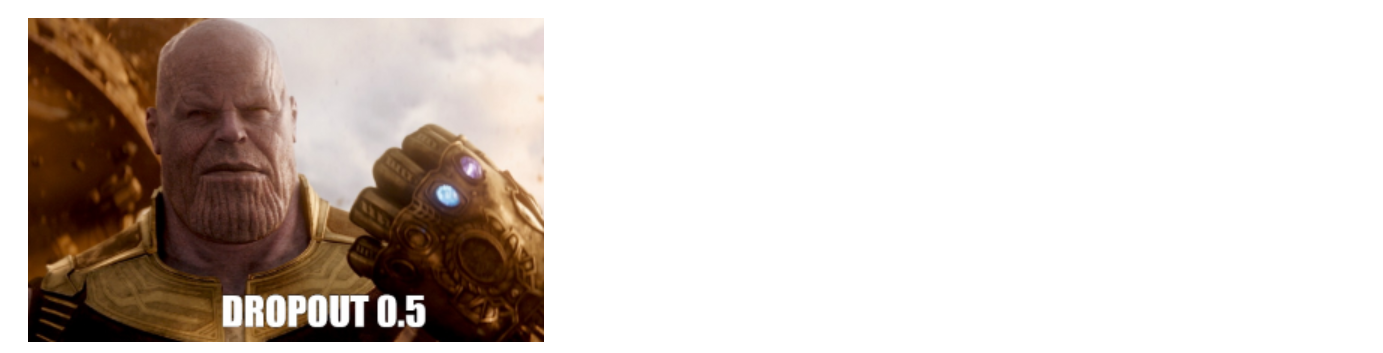

In [8]:
from IPython.display import Image
Image("o1.PNG")

- 예를들어 드롭아웃의 비율을 0.5로 한다면 학습 과정마다 랜덤으로 절반의 뉴런을 사용하지 않고, 절반의 뉴런만을 사용한다. 

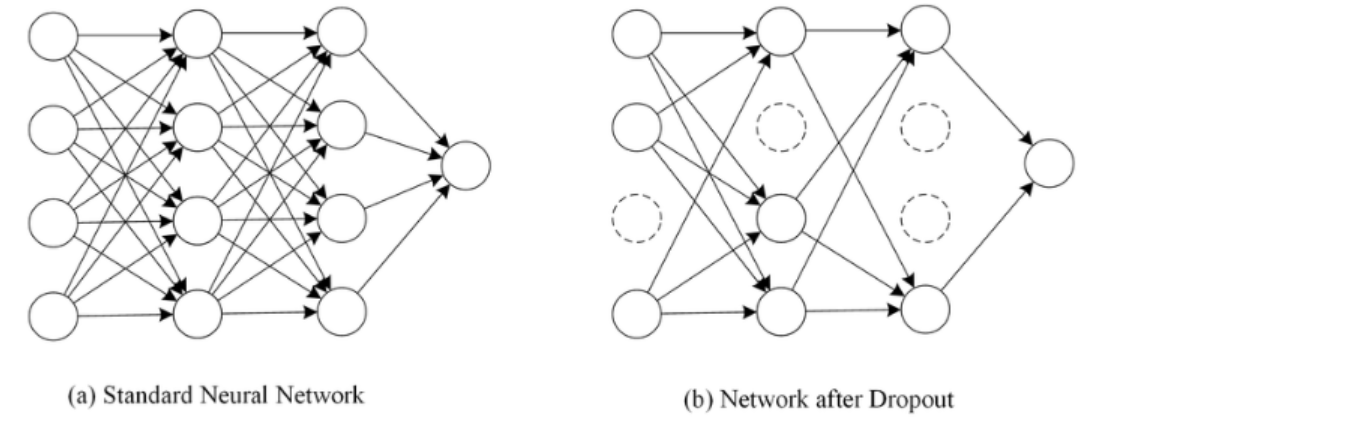

In [9]:
Image("o2.PNG")

- 드롭아웃은 신경망 학습 시에만 사용하고, 예측 시에는 사용하지 않는 것이 일반적이다. 
- 학습 시에 인공 신경망이 특정 뉴런 또는 특정 조합에 너무 의존적이게 되는 것을 방지해준다.
- 매번 랜덤 선택을 하므로 서로 다른 신경망들을 앙상블하여 사용하는 것 같은 효과를 내어 과적합을 방지한다. 